In [104]:
# import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../utils/')

sns.set_style("darkgrid")

In [105]:
def vectorized_result(j):

    y = np.zeros((10, 1))
    y[j] = 1.0
    return y



data = pd.read_csv('all.csv', header=None)

X = np.array(data.iloc[:, :-1])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_x = np.array([np.reshape(x, (-1, 1)) for x in X[idx[:frac]]])
train_y = [vectorized_result(y) for y in Y[idx[:frac]]]
train_data = list(zip(train_x, train_y))
test_x = np.array([np.reshape(x, (-1, 1)) for x in X[idx[frac:]]])
test_y = Y[idx[frac:]]
test_data = list(zip(test_x, test_y))

In [106]:
train_images = np.array([np.reshape(x, (28, 28)) for x in X[idx[:frac]]])
train_labels = np.array(Y[idx[:frac]])
test_images = np.array([np.reshape(x, (28, 28)) for x in X[idx[frac:]]])
test_labels = np.array(Y[idx[frac:]])

In [107]:
from tensorflow import keras

In [108]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(10, activation='softmax'),
                          ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels))

Train on 2400 samples, validate on 600 samples
Epoch 1/100
2272/2400 [===========================>..] - ETA: 0s - loss: 12.9480 - acc: 0.1774

c:\Users\acer\anaconda3\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2400/2400 [==============================] - 1s 243us/sample - loss: 12.4165 - acc: 0.1754 - val_loss: 2.5360 - val_acc: 0.1317
Epoch 2/100
2400/2400 [==============================] - 0s 70us/sample - loss: 2.3918 - acc: 0.1721 - val_loss: 2.3637 - val_acc: 0.1617
Epoch 3/100
2400/2400 [==============================] - 0s 51us/sample - loss: 2.1530 - acc: 0.2142 - val_loss: 2.2871 - val_acc: 0.2217
Epoch 4/100
2400/2400 [==============================] - 0s 53us/sample - loss: 2.0321 - acc: 0.2758 - val_loss: 2.1532 - val_acc: 0.2733
Epoch 5/100
2400/2400 [==============================] - 0s 57us/sample - loss: 1.9039 - acc: 0.3296 - val_loss: 1.9965 - val_acc: 0.3300
Epoch 6/100
2400/2400 [==============================] - 0s 66us/sample - loss: 1.7366 - acc: 0.3762 - val_loss: 1.9043 - val_acc: 0.3550
Epoch 7/100
2400/2400 [==============================] - 0s 69us/sample - loss: 1.6875 - acc: 0.4004 - val_loss: 1.9172 - val_acc: 0.3417
Epoch 8/100
2400/2400 [=====================

In [110]:
history.history

{'loss': [12.416539004643758,
  2.3917924245198567,
  2.1530282592773435,
  2.0321259180704754,
  1.9039428981145223,
  1.7365611267089844,
  1.6874642705917358,
  1.6021739117304483,
  1.511320293744405,
  1.477907977104187,
  1.4050240341822307,
  1.3564861186345418,
  1.2854467630386353,
  1.2103730392456056,
  1.2026298912366231,
  1.1928624868392945,
  1.1253016010920207,
  1.0777966411908468,
  1.046962993144989,
  1.0164790733655293,
  0.9736940987904866,
  0.9554607303937276,
  0.9720093560218811,
  0.9098220646381379,
  0.9065632963180542,
  0.8870793275038401,
  0.87085635860761,
  0.8649024232228597,
  0.8408977504571279,
  0.8707630928357443,
  0.8195812547206879,
  0.7785881161689758,
  0.7582191288471222,
  0.673646293481191,
  0.7061374088128408,
  0.6454478108882904,
  0.6421300405263901,
  0.6315338083108266,
  0.5857338261604309,
  0.5731345796585083,
  0.6090573497613271,
  0.5700182096163432,
  0.5661463145414988,
  0.5433542422453562,
  0.5359445347388585,
  0.5148

In [111]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [114]:
history.history['val_acc']

[0.1316666603088379,
 0.1616666615009308,
 0.22166666388511658,
 0.273333340883255,
 0.33000001311302185,
 0.35499998927116394,
 0.34166666865348816,
 0.4216666519641876,
 0.4283333420753479,
 0.41999998688697815,
 0.46166667342185974,
 0.4933333396911621,
 0.4866666793823242,
 0.5266666412353516,
 0.5400000214576721,
 0.5400000214576721,
 0.550000011920929,
 0.5483333468437195,
 0.5483333468437195,
 0.5616666674613953,
 0.5683333277702332,
 0.5649999976158142,
 0.5600000023841858,
 0.5766666531562805,
 0.5600000023841858,
 0.5683333277702332,
 0.5899999737739563,
 0.6016666889190674,
 0.6150000095367432,
 0.6083333492279053,
 0.6499999761581421,
 0.628333330154419,
 0.6816666722297668,
 0.6766666769981384,
 0.6866666674613953,
 0.699999988079071,
 0.7016666531562805,
 0.6966666579246521,
 0.7283333539962769,
 0.7149999737739563,
 0.7116666436195374,
 0.7166666388511658,
 0.7166666388511658,
 0.7266666889190674,
 0.7250000238418579,
 0.7333333492279053,
 0.7433333396911621,
 0.74166667

In [112]:
history.history['acc']

[0.17541666328907013,
 0.17208333313465118,
 0.21416667103767395,
 0.2758333384990692,
 0.3295833468437195,
 0.3762499988079071,
 0.40041667222976685,
 0.4116666615009308,
 0.44083333015441895,
 0.46291667222976685,
 0.48500001430511475,
 0.5062500238418579,
 0.5304166674613953,
 0.5587499737739563,
 0.5633333325386047,
 0.5766666531562805,
 0.5845833420753479,
 0.6045833230018616,
 0.6162499785423279,
 0.6166666746139526,
 0.6358333230018616,
 0.6370833516120911,
 0.628333330154419,
 0.6508333086967468,
 0.6462500095367432,
 0.6608333587646484,
 0.6658333539962769,
 0.67166668176651,
 0.6816666722297668,
 0.6704166531562805,
 0.6958333253860474,
 0.7137500047683716,
 0.7170833349227905,
 0.7495833039283752,
 0.753333330154419,
 0.7662500143051147,
 0.7637500166893005,
 0.7708333134651184,
 0.7795833349227905,
 0.7837499976158142,
 0.768750011920929,
 0.7795833349227905,
 0.7891666889190674,
 0.7945833206176758,
 0.7987499833106995,
 0.8020833134651184,
 0.8041666746139526,
 0.80583333

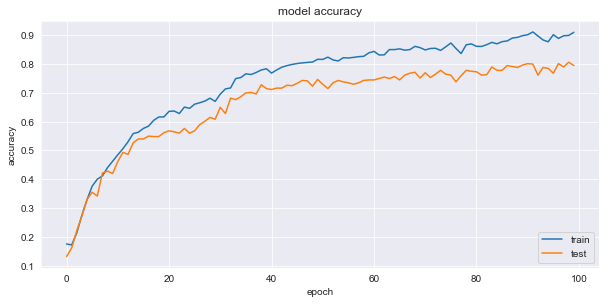

In [115]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

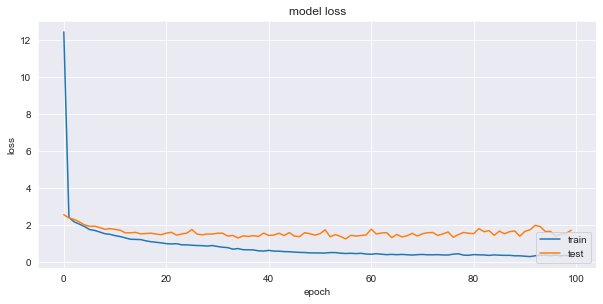

In [116]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [117]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import pandas as pd
from time import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from random import shuffle

In [118]:
mnist = pd.read_csv('all.csv')

In [119]:
mnist = np.array(mnist)

train_x,test_x,train_y,test_y = train_test_split(mnist[0:3000,0:784],mnist[0:3000,784:],train_size=0.9,random_state=42)

print(test_x.shape, test_y.shape)
print(train_x.shape, train_y.shape)
print(test_y[0])

(300, 784) (300, 1)
(2699, 784) (2699, 1)
[4]


In [120]:
a = np.array([0,1,2,3,4,5,6,7,8,9])
one_hot_labels = np.zeros((10, 10))
one_hot_labels[np.arange(10), a] = 1

In [121]:
data = []
for i in range(0,mnist.shape[0]):
   data.append([mnist[i][0:784],one_hot_labels[mnist[i][784:][0]]])

In [122]:
i=0
train_x =[]
train_y = []
test_x = []
test_y = []
while(i<3000):
    sample = data[i:i+300]
    shuffle(sample)
    train_x = train_x + list(j[0] for j in sample[i:i+240])

    train_y=train_y+list(j[1] for j in sample[i:i+240])
    test_x = test_x+list(j[0] for j in sample[i+240:])
    test_y = test_y+list(j[1] for j in sample[i+240:])
    i= i+300


In [123]:
print(len(train_x),len(train_y),len(test_x),len(test_y))

train_x = list(i[0] for i in data[0:2400])
train_y = list(i[1] for i in data[0:2400])
test_x = list(i[0] for i in data[2400:])
test_y = list(i[1] for i in data[2400:])

print(train_x[0],train_y[0])

240 240 60 60
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  16 162 197 232 233 232 232 232 144 110
   6   0   0   0   0   0   0   0   0   0   0   0   0   0  27   0   0 126
 232 252 252 252 227 226 252 236 242 

In [124]:
n_nodes_hl1 = 10
n_nodes_hl2 = 10
n_nodes_hl3 = 10

n_classes = 10
batch_size = 100
hm_epochs = 50

x = tf.compat.v1.placeholder('float')
y = tf.compat.v1.placeholder('float')

In [ ]:
hidden_1_layer = {
                  'weight': tf.Variable(tf.random_normal([len(train_x[0]), n_nodes_hl1])),
                  'bias': tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_2_layer = {
                  'weight': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias': tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_3_layer = {
                  'weight': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'bias': tf.Variable(tf.random_normal([n_nodes_hl3]))}

output_layer = {
                'weight': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                'bias': tf.Variable(tf.random_normal([n_classes])), }

In [127]:
# Nothing changes
def neural_network_model(data):
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weight']), hidden_1_layer['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weight']), hidden_2_layer['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weight']), hidden_3_layer['bias'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3, output_layer['weight']) + output_layer['bias']

    return output

In [ ]:

hidden_layer_sizes_range = [(35,30)]
activation_range = ['relu']
alpha_range=[0.01,0.1,1,10,50,500]
learning_rate_init_range = [0.0000001,0.000001,0.00001,0.0001,0.001,0.001,0.1,1]
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes_range,activation = activation_range,alpha=alpha_range,
                  learning_rate_init=learning_rate_init_range,max_iter=[100],solver=['adam'])
clf = GridSearchCV(MLPClassifier(),param_grid=param_grid,cv=StratifiedKFold(n_splits=5))
clf.fit(train_x,train_y.ravel())
pred=clf.predict(test_x)
print('train accuracy',clf.score(train_x,train_y.ravel()))
print('test accuracy', clf.score(test_x,test_y.ravel()))
print(clf.best_estimator_)

In [10]:
#BEST FIT

clf=MLPClassifier(hidden_layer_sizes=(250,200,150),activation='relu',alpha = 50, solver='adam',learning_rate='constant',
	learning_rate_init=1e-05,max_iter=2500)
clf=MLPClassifier(hidden_layer_sizes=(160,80),activation='relu',alpha = 100, solver='adam',learning_rate='constant',
	learning_rate_init=0.0001,max_iter=1000)

In [11]:
#hidden layer = [250,200,150]
clf=MLPClassifier(hidden_layer_sizes=(80,50),activation='relu',alpha = 50, solver='adam',learning_rate='constant',
	learning_rate_init=0.0001,max_iter=200)

In [12]:
clf=MLPClassifier(hidden_layer_sizes=(250,200,150),activation='relu',alpha = 50, solver='adam',learning_rate='constant',
	learning_rate_init=1e-05,max_iter=2500,random_state=1)

In [13]:
t0 =time()
clf.fit(train_x,train_y.ravel())
print(0.001,'learning_rate_init')
print('fiiting time',time()-t0)
t0 = time()
pred=clf.predict(test_x)

correct_x = []
correct_y =[]
wrong_x = []
wrong_y = []

0.001 learning_rate_init
fiiting time 792.9344367980957


In [14]:
print(test_x)
for i in range(300):
    if(pred[i] != test_y.ravel()[i]):
        wrong_x = wrong_x + [test_x[i]]
        wrong_y = wrong_y + [[test_y[i],pred[i]]]
    else:
        correct_x = correct_x + [test_x[i]]
        correct_y = correct_y + [test_y[i]]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
print('predicting time',time()-t0)
print('train accuracy',clf.score(train_x,train_y.ravel()))
print('test accuracy', clf.score(test_x,test_y.ravel()))

predicting time 183.31234908103943
train accuracy 0.9855502037791775
test accuracy 0.9166666666666666


In [45]:
len(correct_y)

275

In [48]:
len(test_y)

599

In [16]:
print(clf.n_layers_)
print(clf.n_outputs_)
print("coefficients")
weight_matrix = clf.coefs_
print(len(weight_matrix))
print('intercepts')
print(clf.intercepts_)
print(len(weight_matrix))

print(weight_matrix[0].shape)

5
10
coefficients
4
intercepts
[array([ 0.12128908, -0.0099928 , -0.04357764, -0.00506527,  0.0675116 ,
       -0.01462739,  0.01014802,  0.11439159,  0.05193686,  0.04027986,
        0.00429674, -0.03747721,  0.09037307,  0.01416894,  0.08076593,
        0.10189259, -0.00559866, -0.04090511,  0.07455333,  0.03754575,
        0.00014623, -0.00605812, -0.05422198, -0.05341574, -0.0513809 ,
        0.0554873 ,  0.07107448,  0.03364213,  0.11285131, -0.00198866,
        0.07972188, -0.07578707,  0.07653911, -0.03687331,  0.07327315,
       -0.06352322,  0.10675615,  0.07488138, -0.07199751,  0.05662944,
       -0.03243613,  0.05683719,  0.04503209,  0.00575188,  0.04196035,
        0.05332032, -0.05056369,  0.04093365, -0.03760979,  0.09455942,
        0.05607996,  0.06521174,  0.00982415,  0.01826458, -0.03148744,
        0.01557296, -0.00671402, -0.0289833 , -0.00898805, -0.02263065,
        0.06394857, -0.04570558, -0.00056266, -0.01083254, -0.00671439,
       -0.02909248,  0.0704536 ,

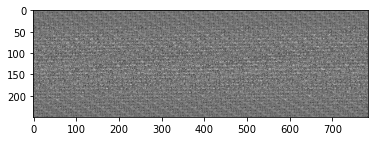

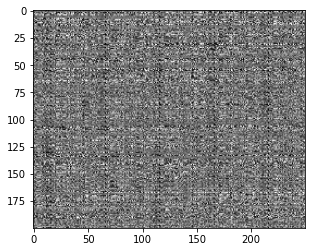

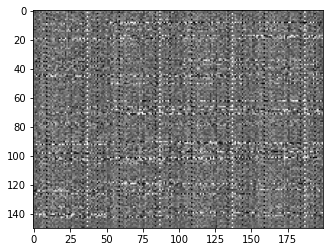

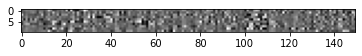

In [17]:
w1= MinMaxScaler(feature_range=(0,255)).fit_transform(weight_matrix[0])
w1 = np.reshape(w1,(250,784))
plt.imshow(w1,cmap='gray')
plt.show()

w2= MinMaxScaler(feature_range=(0,255)).fit_transform(weight_matrix[1])
w2 = np.reshape(w2,(200,250))
plt.imshow(w2,cmap='gray')
plt.show()

w3 = MinMaxScaler(feature_range=(0,255)).fit_transform(weight_matrix[2])
w3 = np.reshape(w3,(150,200))
plt.imshow(w3,cmap='gray')
plt.show()

w4 = MinMaxScaler(feature_range=(0,255)).fit_transform(weight_matrix[3])
w4 = np.reshape(w4,(10,150))
plt.imshow(w4,cmap='gray')
plt.show()

0


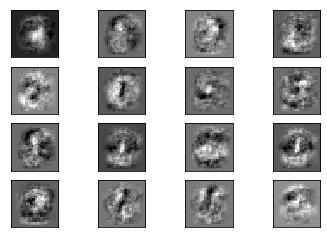

In [18]:

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    #,  vmin=.5 * vmin vmax=.5 * vmax
    ax.matshow(coef.reshape(28, 28),cmap=plt.get_cmap('gray'))
    ax.set_xticks(())
    ax.set_yticks(())
print(0)
plt.show()

1


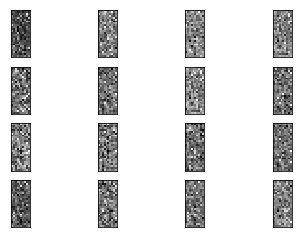

In [19]:
fig, axes = plt.subplots(4, 4)
for coef, ax in zip(clf.coefs_[1].T, axes.ravel()):
    #,  vmin=.5 * vmin vmax=.5 * vmax
    ax.matshow(coef.reshape(25, 10),cmap=plt.get_cmap('gray'))
    ax.set_xticks(())
    ax.set_yticks(())
print(1)
plt.show()

12


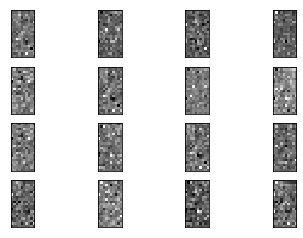

In [20]:
fig, axes = plt.subplots(4, 4)
for coef, ax in zip(clf.coefs_[2].T, axes.ravel()):
    #,  vmin=.5 * vmin vmax=.5 * vmax
    ax.matshow(coef.reshape(20, 10),cmap=plt.get_cmap('gray'))
    ax.set_xticks(())
    ax.set_yticks(())
print(12)
plt.show()

123


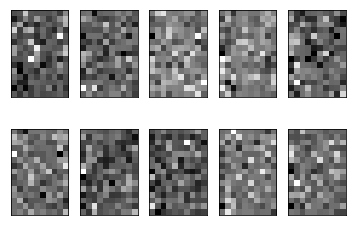

In [21]:
fig, axes = plt.subplots(2, 5)
for coef, ax in zip(clf.coefs_[3].T, axes.ravel()):
    #,  vmin=.5 * vmin vmax=.5 * vmax
    ax.matshow(coef.reshape(15, 10),cmap=plt.get_cmap('gray'))
    ax.set_xticks(())
    ax.set_yticks(())
print(123)
plt.show()

c:\Users\acer\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


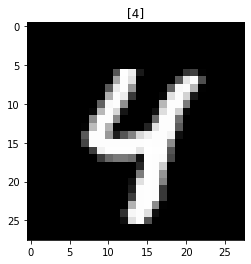

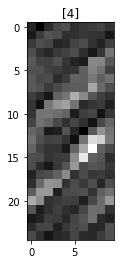

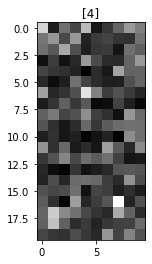

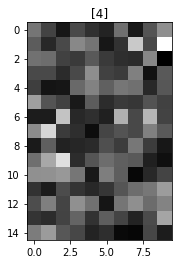

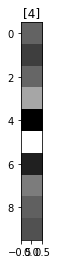

In [22]:
#correct classification visualization
img = np.reshape(correct_x[0],(28,28))
plt.imshow(img,cmap='gray')
plt.title(correct_y[0])
plt.show()

img = np.reshape(img,(784,1))
img = np.dot(w1,img)
img1 = np.reshape(img,(25,10))
plt.imshow(img1,cmap='gray')
plt.title(correct_y[0])
plt.show()

img = np.dot(w2,img)
img2 = np.reshape(img,(20,10))
plt.imshow(img2,cmap='gray')
plt.title(correct_y[0])
plt.show()

img = np.dot(w3,img)
img3 = np.reshape(img,(15,10))
plt.imshow(img3,cmap='gray')
plt.title(correct_y[0])
plt.show()

img = np.dot(w4,img)
img4 = np.reshape(img,(10,1))
plt.imshow(img4,cmap='gray')
plt.title(correct_y[0])
plt.show()


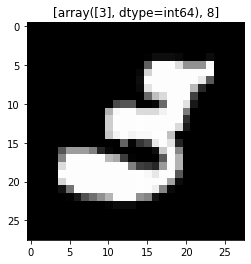

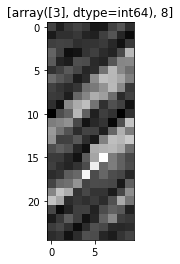

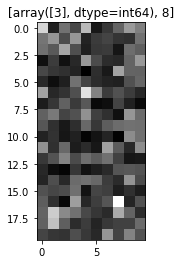

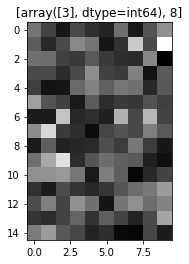

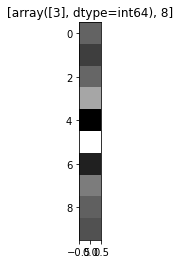

In [23]:
#wrong classification visualization
img = np.reshape(wrong_x[0],(28,28))
plt.imshow(img,cmap='gray')
plt.title(wrong_y[0])
plt.show()

img = np.reshape(img,(784,1))
img = np.dot(w1,img)
img1 = np.reshape(img,(25,10))
plt.imshow(img1,cmap='gray')
plt.title(wrong_y[0])
plt.show()

img = np.dot(w2,img)
img2 = np.reshape(img,(20,10))
plt.imshow(img2,cmap='gray')
plt.title(wrong_y[0])
plt.show()

img = np.dot(w3,img)
img3 = np.reshape(img,(15,10))
plt.imshow(img3,cmap='gray')
plt.title(wrong_y[0])
plt.show()

img = np.dot(w4,img)
img4 = np.reshape(img,(10,1))
plt.imshow(img4,cmap='gray')
plt.title(wrong_y[0])
plt.show()

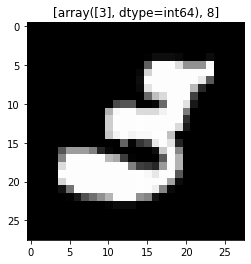

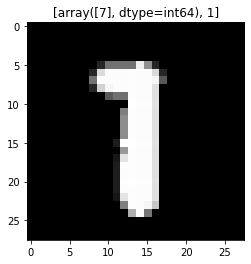

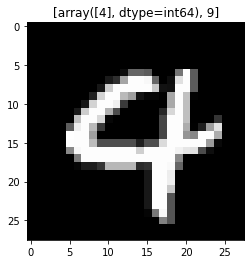

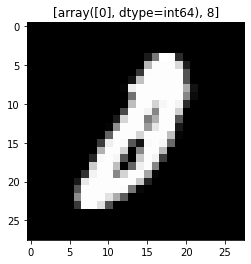

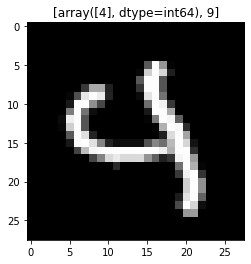

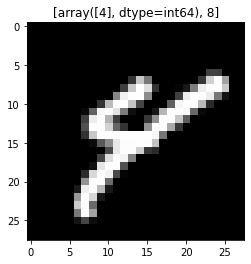

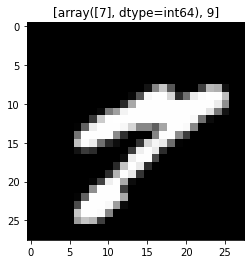

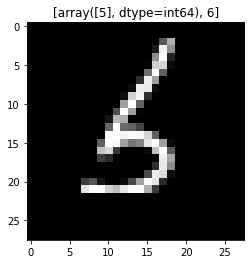

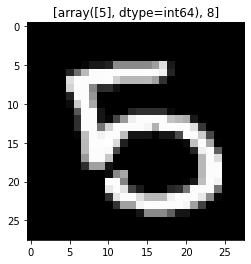

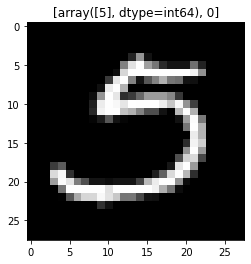

In [24]:
for i in range(10):

	img = np.reshape(wrong_x[i],(28,28))
	plt.imshow(img,cmap='gray')
	plt.title(wrong_y[i])
	plt.show()